# Example of EPU Model Creation and Beam Trajectory Calculation

## Initializations

In [2]:
import numpy
import matplotlib.pyplot as plt
import idpy

%matplotlib notebook

## Create EPU Model

In [3]:
# Number of periods of the Halbach cassette
id_nr_periods = 20

# ID gap [meter]
id_gap = 0.020

# ID period length [meter]
id_period_length = 0.040 

# Block Magnetization (magnetization of the first block in vertical direction) [Tesla]
mag = [0,1.45,0]

# Block Dimension [meter]
dim = [0.060,0.060,id_period_length/4]

# Position of the center of the first block [meter]
pos = [0,0,0]

# Create block
block = idpy.cassette.Block(mag, dim, pos)

# Magnetization rotation matrix 
rot = idpy.utils.rotx90p

# Create a Halbach cassette
epu = idpy.idmodel.EPU(block, id_nr_periods, id_gap, 0)

## Plot Fields

<IPython.core.display.Javascript object>


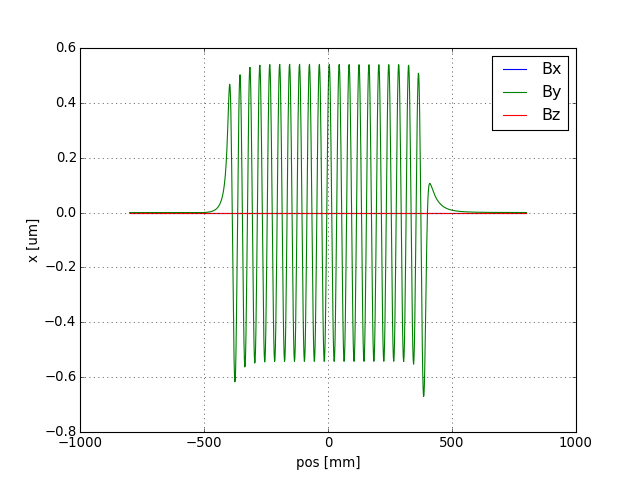

In [4]:
nr_pts = 1000
posx = 0.000
posy = 0.000

pos = numpy.zeros((nr_pts,3))
pos[:,0] = posx
pos[:,1] = posy
pos[:,2] = numpy.linspace(epu.zmin-0.400,epu.zmax+0.400,nr_pts)

field = epu.field(pos)

# saves field to file
data = numpy.hstack([pos,field])
numpy.savetxt('field.txt', data)

# plots By
plt.plot(pos[:,2]*1000, field[:,0])
plt.plot(pos[:,2]*1000, field[:,1])
plt.plot(pos[:,2]*1000, field[:,2])
plt.legend(['Bx','By','Bz'])
plt.show()

## Trajectory calculations

In [5]:
r = idpy.functions.runge_kutta(magnet = epu, 
                               energy = 3e9, 
                               r = [0.010,0.005,-1.0], p = [0,0,1], 
                               zmax = 1.0, step = 0.0005,
                              trajectory_flag = True)

<IPython.core.display.Javascript object>


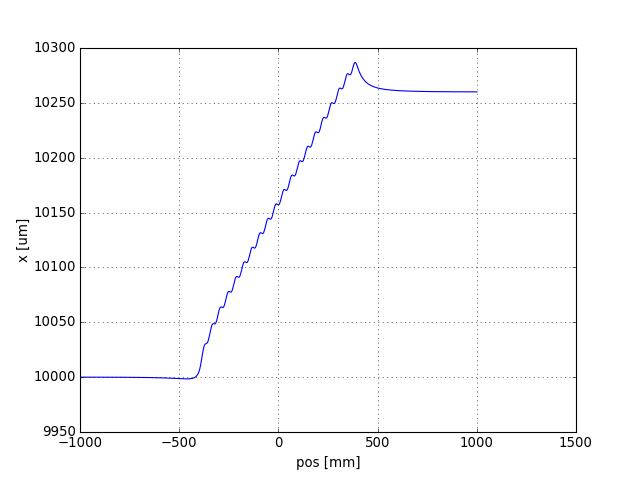

<IPython.core.display.Javascript object>


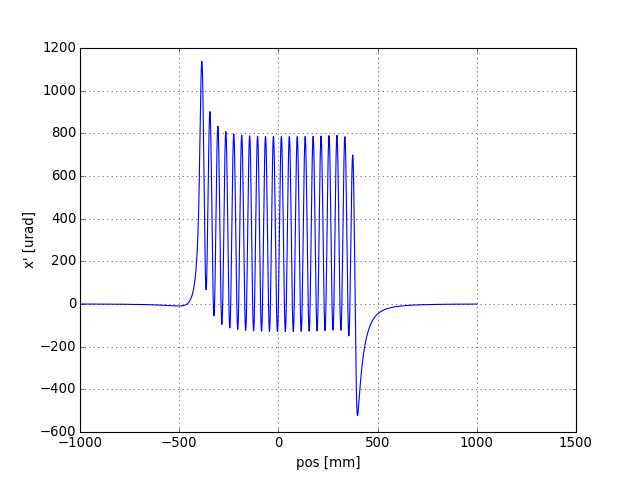

In [14]:
plt.figure()
plt.plot(1000*r[:,2],1e6*r[:,0])
plt.xlabel('pos [mm]')
plt.ylabel('x [um]')
plt.grid('on')

plt.figure()
plt.plot(1000*r[:,2],1e6*r[:,3])
plt.xlabel('pos [mm]')
plt.ylabel("x' [urad]")
plt.grid('on')